<a href="https://colab.research.google.com/github/vxm80390/assignment5/blob/main/NNDL_700748039_ICP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Basic packages for creating dataframes and loading dataset
import numpy as np

import matplotlib.pyplot as plt #Package for visualization

import re #importing package for Regular expression operations

from sklearn.model_selection import train_test_split #Package for splitting the data

from sklearn.preprocessing import LabelEncoder #Package for conversion of categorical to Numerical

from keras.preprocessing.text import Tokenizer #Tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences #Add zeros or crop based on the length
from keras.models import Sequential #Sequential Neural Network
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D #For layers in Neural Network
from keras.utils.np_utils import to_categorical

In [ ]:
# Load the dataset as a Pandas DataFrame
dataset = pd.read_csv('Sentiment.csv')

# Select only the necessary columns 'text' and 'sentiment'
mask = dataset.columns.isin(['text', 'sentiment'])
data = dataset.loc[:, mask]

# Preprocess the text data
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))
data['text'] = data['text'].apply(lambda x: x.replace('rt', ' '))  # Remove 'rt' (Retweets)


/var/folders/j2/jgtk9n5d0j75kqdk9733wh_h0000gn/T/ipykernel_56266/3905233759.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: x.lower())
/var/folders/j2/jgtk9n5d0j75kqdk9733wh_h0000gn/T/ipykernel_56266/3905233759.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))
/var/folders/j2/jgtk9n5d0j75kqdk9733wh_h0000gn/T/ipykernel_56266/3905233759.py:11: SettingWithCopyWarning: 
A value is tryi

In [ ]:
# Define the function to create the LSTM model
def createmodel():
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Tokenization
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

# Label Encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['sentiment'])
y = to_categorical(integer_encoded)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
# LSTM Model Architecture
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 128)           256000    
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 3)                 591       
                                                                 
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


2023-07-31 14:58:59.547834: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


291/291 - 22s - loss: 0.8312 - accuracy: 0.6380 - val_loss: 0.7549 - val_accuracy: 0.6660 - 22s/epoch - 75ms/step
Epoch 2/10
291/291 - 21s - loss: 0.6831 - accuracy: 0.7087 - val_loss: 0.7446 - val_accuracy: 0.6826 - 21s/epoch - 74ms/step
Epoch 3/10
291/291 - 22s - loss: 0.6141 - accuracy: 0.7429 - val_loss: 0.7552 - val_accuracy: 0.6817 - 22s/epoch - 75ms/step
Epoch 4/10
291/291 - 22s - loss: 0.5680 - accuracy: 0.7615 - val_loss: 0.7675 - val_accuracy: 0.6723 - 22s/epoch - 77ms/step
Epoch 5/10
291/291 - 23s - loss: 0.5267 - accuracy: 0.7850 - val_loss: 0.8480 - val_accuracy: 0.6662 - 23s/epoch - 80ms/step
Epoch 6/10
291/291 - 24s - loss: 0.4838 - accuracy: 0.8062 - val_loss: 0.8630 - val_accuracy: 0.6660 - 24s/epoch - 83ms/step
Epoch 7/10
291/291 - 23s - loss: 0.4405 - accuracy: 0.8217 - val_loss: 0.9373 - val_accuracy: 0.6601 - 23s/epoch - 78ms/step
Epoch 8/10
291/291 - 23s - loss: 0.4068 - accuracy: 0.8354 - val_loss: 0.9919 - val_accuracy: 0.6627 - 23s/epoch - 79ms/step
Epoch 9/10


144/144 - 2s - loss: 1.2010 - accuracy: 0.6496 - 2s/epoch - 12ms/step
Test Loss: 1.200998306274414
Test Accuracy: 0.6496286392211914


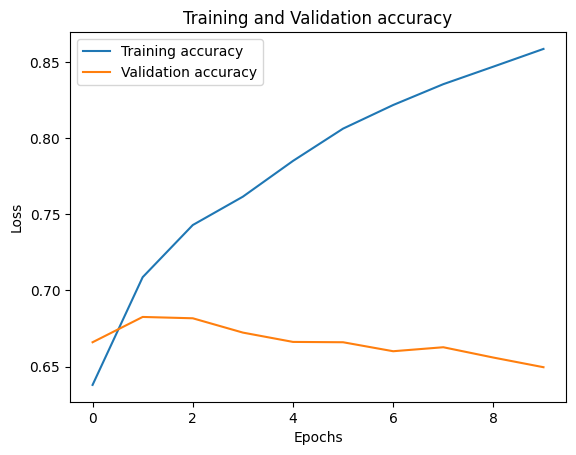

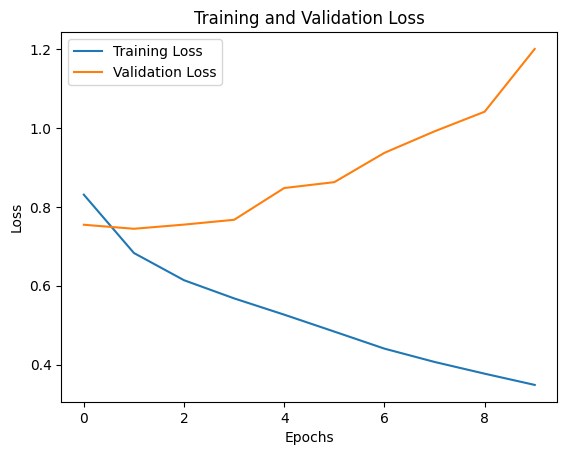

In [ ]:
# Evaluate the model on test data
score, accuracy = model.evaluate(X_test, y_test, verbose=2, batch_size=32)
print("Test Loss:", score)
print("Test Accuracy:", accuracy)


# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation accuracy')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Save the trained model
model.save('sentimentAnalysis.h5')


In [ ]:
from keras.models import load_model

model = load_model('sentimentAnalysis.h5')


In [ ]:
# Define the text data to predict sentiment
sentence = ['A lot of good things are happening. We are respected again throughout the world, and that is a great thing. @realDonaldTrump']

# Tokenize and pad the sentence
sentence = tokenizer.texts_to_sequences(sentence)
sentence = pad_sequences(sentence, maxlen=28, dtype='int32', value=0)


In [ ]:
# Make predictions using the loaded model
sentiment_probs = model.predict(sentence, batch_size=1, verbose=2)[0]

# Convert sentiment probabilities to sentiment label
sentiment = np.argmax(sentiment_probs)

# Print the sentiment label
if sentiment == 0:
    print("Neutral")
elif sentiment < 0:
    print("Negative")
elif sentiment > 0:
    print("Positive")
else:
    print("Cannot be determined")


1/1 - 0s - 129ms/epoch - 129ms/step
Positive


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier #importing Keras classifier
from sklearn.model_selection import GridSearchCV #importing Grid search CV

In [ ]:
# Now you can proceed with the GridSearchCV
model = KerasClassifier(build_fn=createmodel, verbose=2)
batch_size = [10, 20, 40]
epochs = [1, 2]
param_grid = {'batch_size': batch_size, 'epochs': epochs}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)


# Print the best score and best hyperparameters found by GridSearchCV
print("Best Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/var/folders/j2/jgtk9n5d0j75kqdk9733wh_h0000gn/T/ipykernel_56266/2033541230.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=createmodel, verbose=2)


744/744 - 45s - loss: 0.8254 - accuracy: 0.6504 - 45s/epoch - 60ms/step
186/186 - 2s - loss: 0.7861 - accuracy: 0.6740 - 2s/epoch - 10ms/step
744/744 - 43s - loss: 0.8287 - accuracy: 0.6465 - 43s/epoch - 58ms/step
186/186 - 2s - loss: 0.7656 - accuracy: 0.6837 - 2s/epoch - 8ms/step
744/744 - 41s - loss: 0.8223 - accuracy: 0.6462 - 41s/epoch - 56ms/step
186/186 - 1s - loss: 0.7625 - accuracy: 0.6805 - 1s/epoch - 8ms/step
744/744 - 42s - loss: 0.8215 - accuracy: 0.6416 - 42s/epoch - 56ms/step
186/186 - 2s - loss: 0.7480 - accuracy: 0.6781 - 2s/epoch - 9ms/step
744/744 - 41s - loss: 0.8181 - accuracy: 0.6476 - 41s/epoch - 56ms/step
186/186 - 1s - loss: 0.7746 - accuracy: 0.6652 - 1s/epoch - 8ms/step
Epoch 1/2
744/744 - 42s - loss: 0.8362 - accuracy: 0.6392 - 42s/epoch - 57ms/step
Epoch 2/2
744/744 - 42s - loss: 0.6851 - accuracy: 0.7081 - 42s/epoch - 56ms/step
186/186 - 1s - loss: 0.7373 - accuracy: 0.6848 - 1s/epoch - 8ms/step
Epoch 1/2
744/744 - 42s - loss: 0.8215 - accuracy: 0.6465 - 4

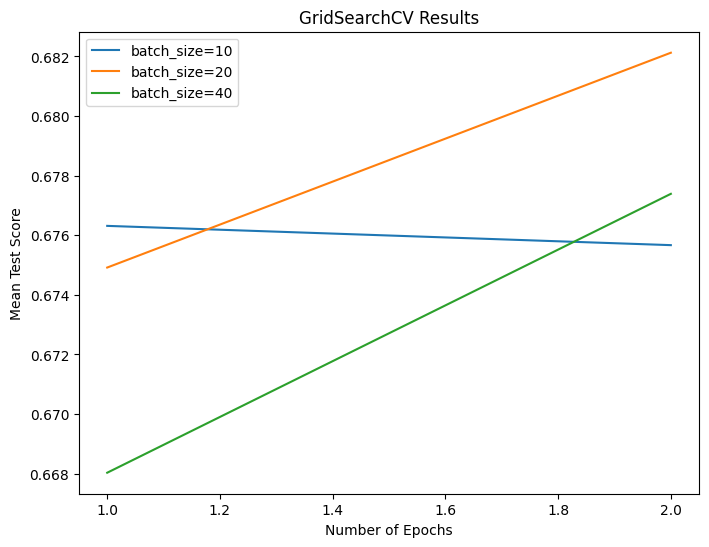

In [ ]:
# Plot the results of GridSearchCV
mean_scores = grid_result.cv_results_['mean_test_score']
param_batch_size = grid_result.cv_results_['param_batch_size']
param_epochs = grid_result.cv_results_['param_epochs']

plt.figure(figsize=(8, 6))
for i, batch_size in enumerate(batch_size):
    plt.plot(epochs, mean_scores[i * len(epochs): (i + 1) * len(epochs)], label=f'batch_size={batch_size}')

plt.xlabel('Number of Epochs')
plt.ylabel('Mean Test Score')
plt.title('GridSearchCV Results')
plt.legend()
plt.show()